In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

In [2]:
df = dd.read_hdf('cdc_data_comp.h5', key='pm')

In [3]:
print(df.shape)
df.head()

(Delayed('int-61afb24b-3a26-42d0-b880-6fc9c2ff1dbc'), 6)


,date,statefips,countyfips,ctfips,ds_pm_pred,ds_pm_stdd
0,2014-01-01,48,48061,48061014100,13.9979,14.838600
1,2014-01-01,48,48061,48061013309,14.2144,14.952600
2,2014-01-01,48,48061,48061013308,14.8740,15.778600
3,2014-01-01,48,48061,48061013307,14.7068,15.408500
4,2014-01-01,48,48061,48061013306,14.6796,16.274099


In [4]:
df.dtypes

date          datetime64[ns]
statefips               int8
countyfips             int32
ctfips                 int64
ds_pm_pred           float32
ds_pm_stdd           float32
dtype: object

In [5]:
s = df.groupby(['date', 'statefips'])['ds_pm_pred'].mean().compute()
s = s.reset_index()
s

,date,statefips,ds_pm_pred
0,2014-01-01,6,39.299331
1,2014-01-01,17,15.382132
2,2014-01-01,48,16.102386
3,2014-01-02,6,19.368596
4,2014-01-02,17,6.944353
...,...,...,...
1090,2014-12-30,17,7.521486
1091,2014-12-30,48,7.925686
1092,2014-12-31,6,11.890595
1093,2014-12-31,17,5.729459


In [6]:
# ca = s.query('statefips==6').copy()
# tx = s.query('statefips==48').copy()
# il = s.query('statefips==17').copy()

s['statefips'] = s['statefips'].replace({6: 'ca', 17: 'il', 48: 'tx'})
d = s.pivot(index='date', columns='statefips', values='ds_pm_pred')
d

statefips,ca,il,tx
date,,,
2014-01-01,39.299331,15.382132,16.102386
2014-01-02,19.368596,6.944353,10.473024
2014-01-03,22.290056,13.145475,11.957419
2014-01-04,28.643245,12.603330,9.464039
2014-01-05,16.998550,8.787890,6.297517
...,...,...,...
2014-12-27,10.460673,8.563396,6.817430
2014-12-28,14.060620,7.383902,4.900371
2014-12-29,15.314060,10.385866,9.859188


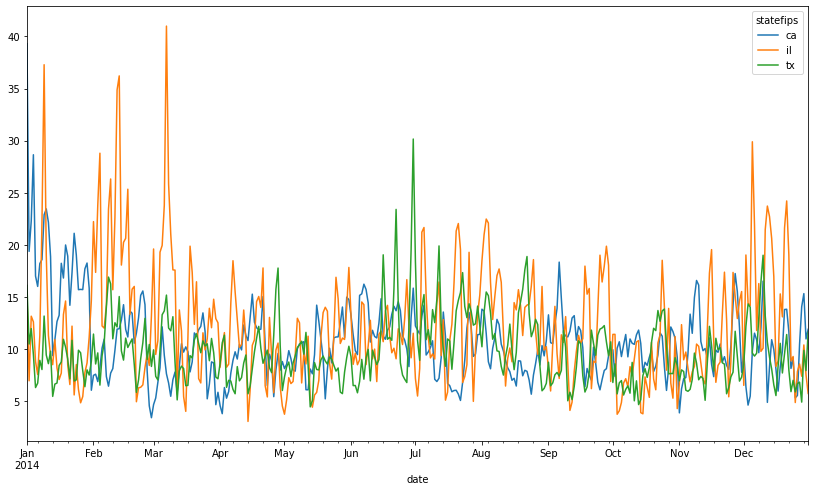

In [7]:
d.plot(figsize=(14,8));